In [1]:
import pandas as pd
import numpy as np

In [24]:
cell_df="/home/maria/LuckyMouse2/neuron_property_decoding/data/cell_metrics_joined.csv"
neuron_embeddings="/home/maria/LuckyMouse2/neuron_property_decoding/data/neuron_embeddings.npy"

In [6]:
cell_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'all_stim', 'area', 'cell_specimen_id',
       'donor_full_genotype', 'dsi_dg', 'experiment_container_id',
       'failed_experiment_container', 'g_dsi_dg', 'g_osi_dg', 'g_osi_sg',
       'image_sel_ns', 'imaging_depth', 'osi_dg', 'osi_sg', 'p_dg', 'p_ns',
       'p_run_mod_dg', 'p_run_mod_ns', 'p_run_mod_sg', 'p_sg', 'peak_dff_dg',
       'peak_dff_ns', 'peak_dff_sg', 'pref_dir_dg', 'pref_image_ns',
       'pref_ori_sg', 'pref_phase_sg', 'pref_sf_sg', 'pref_tf_dg',
       'reliability_dg', 'reliability_nm1_a', 'reliability_nm1_b',
       'reliability_nm1_c', 'reliability_nm2', 'reliability_nm3',
       'reliability_ns', 'reliability_sg', 'rf_area_off_lsn', 'rf_area_on_lsn',
       'rf_center_off_x_lsn', 'rf_center_off_y_lsn', 'rf_center_on_x_lsn',
       'rf_center_on_y_lsn', 'rf_chi2_lsn', 'rf_distance_lsn',
       'rf_overlap_index_lsn', 'run_mod_dg', 'run_mod_ns', 'run_mod_sg',
       'sfdi_sg', 'specimen_id', 'tfdi_dg', 'time_to_peak_ns',
     


✅ Accuracy: 0.3151

📊 Classification Report:
              precision    recall  f1-score   support

       VISal       0.09      0.02      0.03       850
       VISam       0.09      0.05      0.06       408
        VISl       0.20      0.08      0.12      1665
        VISp       0.38      0.73      0.50      2876
       VISpm       0.10      0.02      0.03       954
       VISrl       0.17      0.16      0.17      1089

    accuracy                           0.32      7842
   macro avg       0.17      0.18      0.15      7842
weighted avg       0.23      0.32      0.24      7842



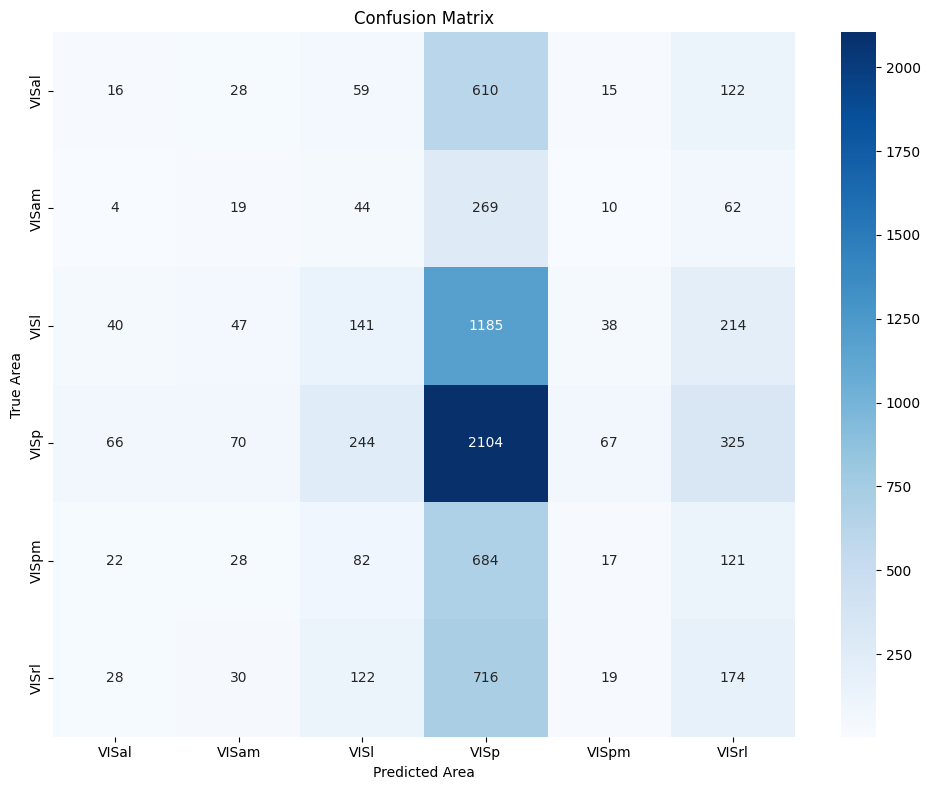

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load data ----
merged_df =cell_df
data_matrix = neuron_embeddings
# ---- Step 1: Sort and extract ----
merged_df = merged_df.sort_values("data_row_index").reset_index(drop=True)
row_indices = merged_df['data_row_index'].values
X = data_matrix[row_indices, :]  # features
y_raw = merged_df['area'].values  # brain areas

# ---- Step 2: Encode target ----
le = LabelEncoder()
y = le.fit_transform(y_raw)
area_names = le.classes_

# ---- Step 3: Stratified split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 4: Train SVM ----
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42, max_iter=10000,class_weight='balanced')
clf.fit(X_train, y_train)

# ---- Step 5: Evaluate ----
y_pred = clf.predict(X_test)

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=area_names))

# ---- Confusion matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=area_names, yticklabels=area_names, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Area")
plt.ylabel("True Area")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


/home/maria/global_venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Accuracy: 0.1798

📊 Classification Report:
              precision    recall  f1-score   support

       VISal       0.12      0.16      0.13       850
       VISam       0.06      0.25      0.09       408
        VISl       0.24      0.10      0.14      1665
        VISp       0.43      0.21      0.28      2876
       VISpm       0.12      0.13      0.12       954
       VISrl       0.17      0.26      0.20      1089

    accuracy                           0.18      7842
   macro avg       0.19      0.18      0.16      7842
weighted avg       0.26      0.18      0.20      7842



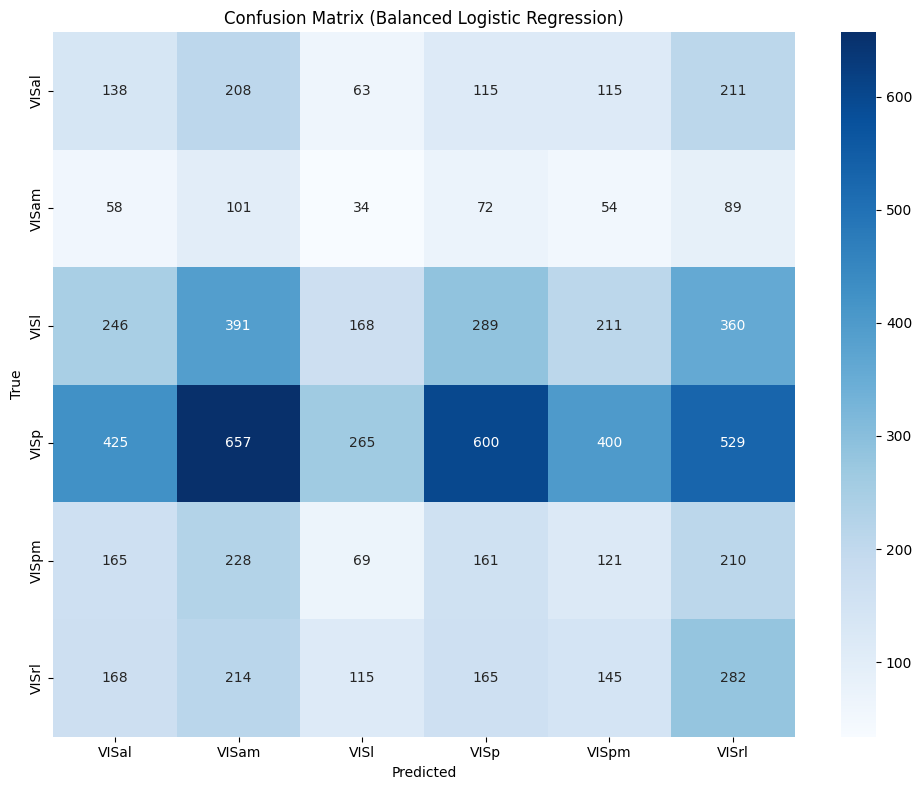

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---- Assume these are already loaded ----
# merged_df: contains metrics and 'data_row_index'
# data_matrix: your 30,000 x 64 neural responses

# ---- Sort and extract data ----
merged_df = merged_df.sort_values("data_row_index").reset_index(drop=True)
row_indices = merged_df['data_row_index'].values
X = data_matrix[row_indices, :]
y_raw = merged_df['area'].values

# ---- Encode brain areas ----
le = LabelEncoder()
y = le.fit_transform(y_raw)
area_names = le.classes_

# ---- Stratified train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- Train logistic regression with class weights ----
clf = LogisticRegression(
    penalty='l2',
    solver='saga',       # robust, scalable solver for large datasets
    max_iter=10000,
    class_weight='balanced',
    random_state=42,
    multi_class='multinomial'  # better for multiclass than 'ovr'
)
clf.fit(X_train, y_train)

# ---- Predict ----
y_pred = clf.predict(X_test)

# ---- Diagnostics ----
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=area_names))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=area_names, yticklabels=area_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Balanced Logistic Regression)")
plt.tight_layout()
plt.show()


✅ Accuracy: 0.2013

📊 Classification Report:
              precision    recall  f1-score   support

       VISal       0.08      0.13      0.10       169
       VISam       0.06      0.08      0.07        85
        VISl       0.22      0.21      0.21       345
        VISp       0.40      0.24      0.30       579
       VISpm       0.13      0.16      0.15       199
       VISrl       0.17      0.22      0.19       223

    accuracy                           0.20      1600
   macro avg       0.18      0.17      0.17      1600
weighted avg       0.24      0.20      0.21      1600



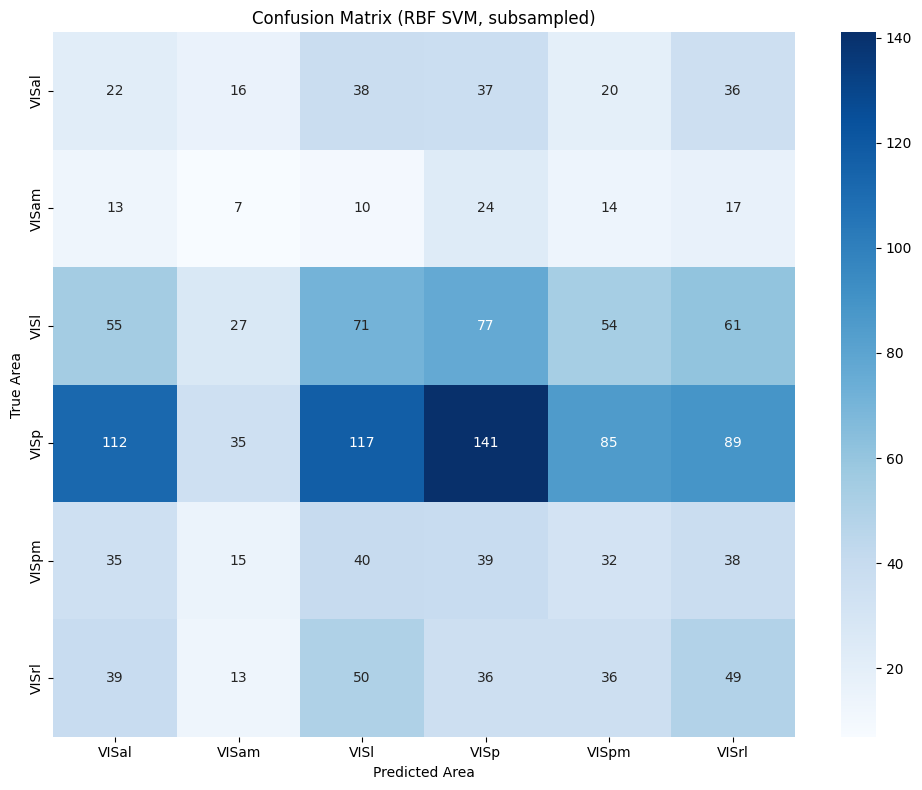

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---- Sort and prepare ----
merged_df = merged_df.sort_values("data_row_index").reset_index(drop=True)
row_indices = merged_df['data_row_index'].values
X = data_matrix[row_indices, :]
y_raw = merged_df['area'].values

# ---- Encode areas ----
le = LabelEncoder()
y = le.fit_transform(y_raw)
area_names = le.classes_

# ---- Subsample the dataset ----
N = 8000  # reduce this if it’s still too slow
rng = np.random.default_rng(42)
sample_indices = rng.choice(len(X), size=N, replace=False)
X_sub = X[sample_indices]
y_sub = y[sample_indices]

# ---- Stratified split ----
X_train, X_test, y_train, y_test = train_test_split(
    X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42
)

# ---- Train SVM with RBF kernel and class balancing ----
clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)

# ---- Predict and evaluate ----
y_pred = clf.predict(X_test)

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=area_names))

# ---- Confusion matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=area_names, yticklabels=area_names)
plt.xlabel("Predicted Area")
plt.ylabel("True Area")
plt.title("Confusion Matrix (RBF SVM, subsampled)")
plt.tight_layout()
plt.show()


In [8]:
merged_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'all_stim', 'area', 'cell_specimen_id',
       'donor_full_genotype', 'dsi_dg', 'experiment_container_id',
       'failed_experiment_container', 'g_dsi_dg', 'g_osi_dg', 'g_osi_sg',
       'image_sel_ns', 'imaging_depth', 'osi_dg', 'osi_sg', 'p_dg', 'p_ns',
       'p_run_mod_dg', 'p_run_mod_ns', 'p_run_mod_sg', 'p_sg', 'peak_dff_dg',
       'peak_dff_ns', 'peak_dff_sg', 'pref_dir_dg', 'pref_image_ns',
       'pref_ori_sg', 'pref_phase_sg', 'pref_sf_sg', 'pref_tf_dg',
       'reliability_dg', 'reliability_nm1_a', 'reliability_nm1_b',
       'reliability_nm1_c', 'reliability_nm2', 'reliability_nm3',
       'reliability_ns', 'reliability_sg', 'rf_area_off_lsn', 'rf_area_on_lsn',
       'rf_center_off_x_lsn', 'rf_center_off_y_lsn', 'rf_center_on_x_lsn',
       'rf_center_on_y_lsn', 'rf_chi2_lsn', 'rf_distance_lsn',
       'rf_overlap_index_lsn', 'run_mod_dg', 'run_mod_ns', 'run_mod_sg',
       'sfdi_sg', 'specimen_id', 'tfdi_dg', 'time_to_peak_ns',
     


✅ Accuracy: 0.0372

📊 Classification Report:
                                                                               precision    recall  f1-score   support

Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)       0.04      0.00      0.01       654
          Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)       0.11      0.01      0.02       662
                          Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt       0.08      0.01      0.01       759
                     Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)-hyg/wt       0.02      0.10      0.03       107
         Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)       0.01      0.11      0.02        64
                         Emx1-IRES-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt       0.18      0.06      0.09      1180
                                 Fezf2-CreER/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt       0.02      0.02      0.02       175
 

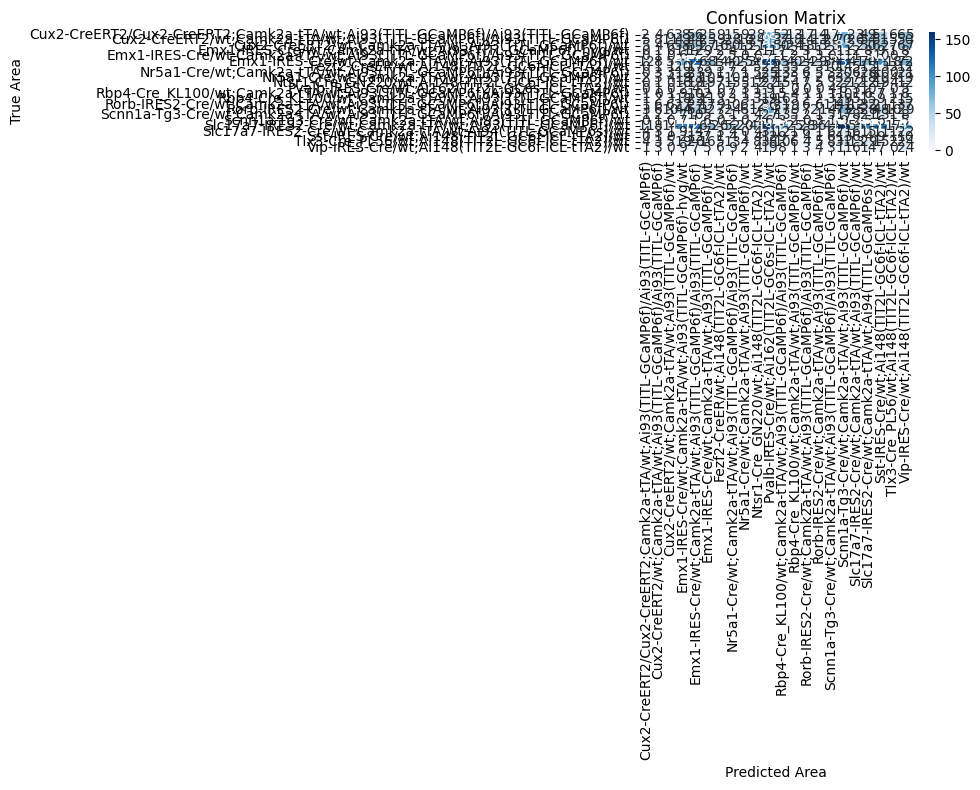

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load data ----
merged_df =cell_df
data_matrix = neuron_embeddings
# ---- Step 1: Sort and extract ----
merged_df = merged_df.sort_values("data_row_index").reset_index(drop=True)
row_indices = merged_df['data_row_index'].values
X = data_matrix[row_indices, :]  # features
y_raw = merged_df['donor_full_genotype'].values  # brain areas

# ---- Step 2: Encode target ----
le = LabelEncoder()
y = le.fit_transform(y_raw)
area_names = le.classes_

# ---- Step 3: Stratified split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 4: Train SVM ----
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42, max_iter=10000,class_weight='balanced')
clf.fit(X_train, y_train)

# ---- Step 5: Evaluate ----
y_pred = clf.predict(X_test)

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=area_names))

# ---- Confusion matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=area_names, yticklabels=area_names, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Area")
plt.ylabel("True Area")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [21]:
merged_df['image_sel_ns']

0        0.390983
1        0.348712
2        0.321407
3        0.314254
4        0.312373
           ...   
39204    0.424746
39205    0.228797
39206    0.026424
39207    0.202915
39208    0.074576
Name: image_sel_ns, Length: 39209, dtype: float64

In [12]:
merged_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'all_stim', 'area', 'cell_specimen_id',
       'donor_full_genotype', 'dsi_dg', 'experiment_container_id',
       'failed_experiment_container', 'g_dsi_dg', 'g_osi_dg', 'g_osi_sg',
       'image_sel_ns', 'imaging_depth', 'osi_dg', 'osi_sg', 'p_dg', 'p_ns',
       'p_run_mod_dg', 'p_run_mod_ns', 'p_run_mod_sg', 'p_sg', 'peak_dff_dg',
       'peak_dff_ns', 'peak_dff_sg', 'pref_dir_dg', 'pref_image_ns',
       'pref_ori_sg', 'pref_phase_sg', 'pref_sf_sg', 'pref_tf_dg',
       'reliability_dg', 'reliability_nm1_a', 'reliability_nm1_b',
       'reliability_nm1_c', 'reliability_nm2', 'reliability_nm3',
       'reliability_ns', 'reliability_sg', 'rf_area_off_lsn', 'rf_area_on_lsn',
       'rf_center_off_x_lsn', 'rf_center_off_y_lsn', 'rf_center_on_x_lsn',
       'rf_center_on_y_lsn', 'rf_chi2_lsn', 'rf_distance_lsn',
       'rf_overlap_index_lsn', 'run_mod_dg', 'run_mod_ns', 'run_mod_sg',
       'sfdi_sg', 'specimen_id', 'tfdi_dg', 'time_to_peak_ns',
     

In [22]:
merged_df['image_sel_ns']

0        0.390983
1        0.348712
2        0.321407
3        0.314254
4        0.312373
           ...   
39204    0.424746
39205    0.228797
39206    0.026424
39207    0.202915
39208    0.074576
Name: image_sel_ns, Length: 39209, dtype: float64

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

col_idx='image_sel_ns'
# ---- Filter to non-NaN rows ----
mask = ~merged_df[col_idx].isna()
filtered_df = merged_df[mask].copy()
filtered_df = filtered_df.sort_values('data_row_index').reset_index(drop=True)

# ---- Get corresponding rows in data matrix ----
row_indices = filtered_df['data_row_index'].values
X = data_matrix[row_indices, :]
y = filtered_df[col_idx].values

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Fit Ridge regression ----
reg = Ridge(alpha=1.0)
reg.fit(X_train, y_train)

# ---- Predict and evaluate ----
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"✅ Variance explained (R²): {r2:.4f}")


✅ Variance explained (R²): -0.0009
